### Python para Data Science 
### Edgar Acuna
### IV. Calculo de  medidas estadisticas de centralidad y de dispersion-Boxplot
###  Agosto 2019

In [1]:
import pandas as pd
import numpy as np
from scipy import stats 

In [2]:
#este cojunto de datos esta disponible en kaggle.com
df=pd.read_csv("http://academic.uprm.edu/eacuna/student-por.csv",sep=",")

In [3]:
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]

In [4]:
#Dimension de la base de datos
print(df.shape)

(649, 33)


In [5]:
#Promedio de la variable age
np.mean(df['age'])

16.7442218798151

In [6]:
#Mediana de la variable age
np.median(df['age'])

17.0

In [7]:
#Calculo de la media usando el modulo stats
stats.describe(df['age'])

DescribeResult(nobs=649, minmax=(15, 22), mean=16.7442218798151, variance=1.483859308718066, skewness=0.41583144316169546, kurtosis=0.06172808922743078)

In [8]:
#calculando la moda de la variable age
stats.mode(df['age'])[0][0]

17

In [9]:
#Calculando la moda de la variable school
stats.mode(df['school'])

C:\Users\eacun\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


ModeResult(mode=array(['GP'], dtype=object), count=array([423]))

In [10]:
#calculando la media podada del 10% de la variable age
stats.trim_mean(df['age'],.1)

16.700575815738965

In [11]:
#Calulando la varianza de la variable age usando numpy
np.var(df['age'])

1.4815729307385221

In [12]:
#Calculando la media de la variable age usando stats
media=stats.describe(df['age'])[2]
print("la media es:", media)

la media es: 16.7442218798151


### La diferencia de lso calculos de la varianza es que en numpy, por defecto, en la formula de la varianza dividen entre n en cambio en stats dividen entre n-1. En la siguiente celda, hacemos que salgan iguales.

In [13]:
#Calculando la varianza de la variable age usando numpy pero dividienedo entre n-1
np.var(df['age'],ddof=1)

1.483859308718057

In [14]:
#Calculando la desviacion estandar de la variable age. El modulo stats no calcula la desviaicon estandar
np.std(df['age'],ddof=1)

1.2181376394800618

In [15]:
#Calculando el coeficiente de variacion
stats.variation(df['age'])*100

7.269366194936092

In [16]:
#Primer Criterio para outliers
lower=np.mean(df['age'])-3*np.std(df['age'],ddof=1)
upper=np.mean(df['age'])+3*np.std(df['age'],ddof=1) 
print ("El intervalo donde caen los datos que NO son outliers es:", "\n",lower,"-",upper)

El intervalo donde caen los datos que NO son outliers es: 
 13.089808961374915 - 20.398634798255287


In [17]:
#Identificando outliers
for a in df['age']:
    if (a<lower or a>upper):
        print("outlier",a)        

outlier 22
outlier 21
outlier 21


{'whiskers': [<matplotlib.lines.Line2D at 0x2281dede400>,
 'caps': [<matplotlib.lines.Line2D at 0x2281dedea90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2281dec6f98>],
 'medians': [<matplotlib.lines.Line2D at 0x2281dedeeb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2281def14a8>],
 'means': []}

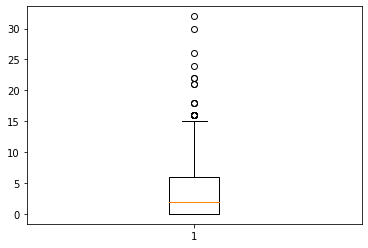

In [18]:
#Trazando el boxplot con matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(df["absences"])

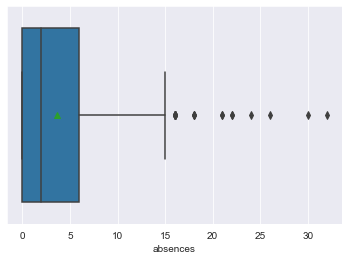

In [19]:
#Trazando el Boxplot con seaborn
import seaborn as sns
sns.set_style("darkgrid")
ax=sns.boxplot(x=df["absences"],showmeans=True)